In [1]:
import pyspark as ps
spark = (ps.sql.SparkSession.builder 
        .master("local[4]") 
        .appName("sparkSQL exercise") 
        .getOrCreate()
        )
sc = spark.sparkContext

In [2]:
french_tweets_df = spark.read.json('data/french_tweets.json')

In [3]:
french_tweets_df.take(1)

[Row(contributors=None, coordinates=None, created_at='Wed Apr 26 13:30:45 +0000 2017', display_text_range=None, entities=Row(hashtags=[], media=None, symbols=[], urls=[], user_mentions=[]), extended_entities=None, extended_tweet=None, favorite_count=0, favorited=False, filter_level='low', geo=None, id=857225437122097152, id_str='857225437122097152', in_reply_to_screen_name=None, in_reply_to_status_id=None, in_reply_to_status_id_str=None, in_reply_to_user_id=None, in_reply_to_user_id_str=None, is_quote_status=False, lang='fr', limit=None, place=Row(bounding_box=Row(coordinates=[[[-0.061141, 49.208997], [-0.061141, 49.250115], [-0.032199, 49.250115], [-0.032199, 49.208997]]], type='Polygon'), country='France', country_code='FR', full_name='Dozulé, France', id='4da693e9b39923ab', name='Dozulé', place_type='city', url='https://api.twitter.com/1.1/geo/id/4da693e9b39923ab.json'), possibly_sensitive=None, quoted_status=None, quoted_status_id=None, quoted_status_id_str=None, retweet_count=0, r

In [4]:
french_tweets_df.printSchema()

root
 |-- contributors: string (nullable = true)
 |-- coordinates: struct (nullable = true)
 |    |-- coordinates: array (nullable = true)
 |    |    |-- element: double (containsNull = true)
 |    |-- type: string (nullable = true)
 |-- created_at: string (nullable = true)
 |-- display_text_range: array (nullable = true)
 |    |-- element: long (containsNull = true)
 |-- entities: struct (nullable = true)
 |    |-- hashtags: array (nullable = true)
 |    |    |-- element: struct (containsNull = true)
 |    |    |    |-- indices: array (nullable = true)
 |    |    |    |    |-- element: long (containsNull = true)
 |    |    |    |-- text: string (nullable = true)
 |    |-- media: array (nullable = true)
 |    |    |-- element: struct (containsNull = true)
 |    |    |    |-- display_url: string (nullable = true)
 |    |    |    |-- expanded_url: string (nullable = true)
 |    |    |    |-- id: long (nullable = true)
 |    |    |    |-- id_str: string (nullable = true)
 |    |    |    |

In [9]:
first_line = french_tweets_df.take(1)


type(first_line[0])

pyspark.sql.types.Row

In [103]:
french_tweets_df.createOrReplaceTempView('french_tweets')
macron_query = '''
SELECT text, timestamp_ms
FROM french_tweets
WHERE  text LIKE '%EmmanuelMacron%' OR
        text LIKE '%Emmanuel Macron%'
'''

macron_df = spark.sql(macron_query)
macron_df.show(5)

+--------------------+-------------+
|                text| timestamp_ms|
+--------------------+-------------+
|Parce que la situ...|1493213464826|
|@EmmanuelMacron D...|1493213467366|
|@fredericmorea11 ...|1493213499712|
|@OriginalDonut @n...|1493213598823|
|@EmmanuelMacron V...|1493213632082|
+--------------------+-------------+
only showing top 5 rows



In [253]:
whirlpool_query ='''
SELECT text, coordinates
FROM french_tweets
WHERE  text LIKE '%whirlpool%' OR
        text LIKE '%Whirlpool%'
'''
whirlpool_df = spark.sql(whirlpool_query)
whirlpool_df.show(5)

+--------------------+-----------+
|                text|coordinates|
+--------------------+-----------+
|#whirlpool… est d...|       null|
|A #Whirlpool #Ami...|       null|
|Ce deuxième tour ...|       null|
|BFM TV c'est gros...|       null|
|Voilà. #Whirlpool...|       null|
+--------------------+-----------+
only showing top 5 rows



In [116]:

mlp_query = '''
SELECT text, timestamp_ms
FROM french_tweets
WHERE  text LIKE '%MLP_officiel%' OR
       text LIKE '%Marine Le Pen%'
'''

mlp_df = spark.sql(mlp_query)
mlp_df.show(5)

+--------------------+-------------+
|                text| timestamp_ms|
+--------------------+-------------+
|A #Whirlpool #Ami...|1493213467518|
|L'optimisme de la...|1493213495760|
|Le piège Le Pen f...|1493213551602|
|La conférence des...|1493213592746|
|@OriginalDonut @n...|1493213598823|
+--------------------+-------------+
only showing top 5 rows



In [111]:
both_query = '''
SELECT text, timestamp_ms, created_at
FROM french_tweets
WHERE  text LIKE '%MLP_officiel%' OR
       text LIKE '%Marine Le Pen%' OR
       text LIKE '%EmmanuelMacron%' OR
       text LIKE '%Emmanuel Macron%'

'''

both_df = spark.sql(both_query)
both_df_2 = both_df.rdd.map(lambda row: (row[0], int(row[1])))
both_df_2.take(5)

[('Parce que la situation est grave... pas une voix pour le #FN... Mon appel à voter @EmmanuelMacron. À voter pour la… https://t.co/w7p82ZG4Od',
  1493213464826),
 ("@EmmanuelMacron Du blabla, je n'ai vraient pas confiance. 5 années de Hollande, ça suffit ! Voter Macron c'est vote… https://t.co/iUYMmorvbM",
  1493213467366),
 ('A #Whirlpool #Amiens, Katia Dubois, déléguée du personnel, qui précise ne pas voter FN: "Il vient juste parce que Marine Le Pen est venue"',
  1493213467518),
 ("L'optimisme de la volonté en selfies à @EnMarcheHerault VS le jeu des caméras et des illusions de @MLP_officiel à… https://t.co/Ud9dW57HSP",
  1493213495760),
 ('@fredericmorea11 @MLM_insoumis @BirgitLlinares @EmmanuelMacron @enmarchefr @lauhaim Bah! Et toi, tu sais pas?',
  1493213499712)]

In [132]:
def timestamp_ms_to_int(df, row_int):
    
    return df.rdd.map(lambda row: (row[0], int(row[1])))

In [87]:


date_query = '''
SELECT created_at, timestamp_ms
FROM french_tweets
WHERE  text LIKE '%@MLP_officiel%' OR
       text LIKE '%@EmmanuelMacron%'
'''

date_df = spark.sql(date_query)
date_df.show(5, truncate=False)

+------------------------------+-------------+
|created_at                    |timestamp_ms |
+------------------------------+-------------+
|Wed Apr 26 13:31:04 +0000 2017|1493213464826|
|Wed Apr 26 13:31:07 +0000 2017|1493213467366|
|Wed Apr 26 13:31:35 +0000 2017|1493213495760|
|Wed Apr 26 13:31:39 +0000 2017|1493213499712|
|Wed Apr 26 13:32:31 +0000 2017|1493213551602|
+------------------------------+-------------+
only showing top 5 rows



In [139]:

mlp_df_2 = timestamp_ms_to_int(mlp_df, 1)
type(mlp_df_2)

pyspark.rdd.PipelinedRDD

In [140]:
import pandas as pd

mlp_pd = pd.DataFrame(mlp_df_2.collect())

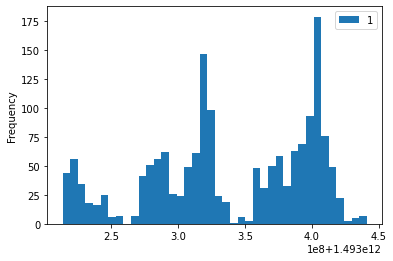

In [201]:
mlp_pd.plot(kind='hist', bins=40)

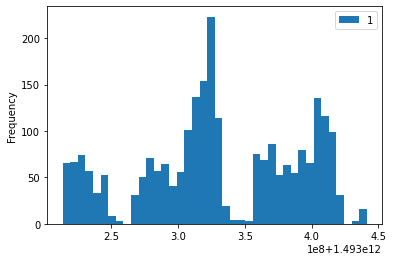

In [182]:
macron_df_2 = timestamp_ms_to_int(macron_df, 1)

macron_pd = pd.DataFrame(macron_df_2.collect())

macron_pd.plot(kind='hist', bins=40)

In [181]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2)

macron_pd.plot(kind='hist', bins=30, ax=axes[0])
mlp_pd.plot(kind='hist', bins=30, ax=axes[1])

ValueError: view limit minimum -74672072854.05 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -74672072854.05 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [242]:
def add_date_time(df):
    return pd.to_datetime(df[1], unit='ms')


In [185]:
macron_pd.head()
macron_pd['Date'] = pd.to_datetime(macron_pd[1], unit='ms')
macron_pd['Date'][0].day

26

In [244]:
mlp_pd['Date'] = add_date_time(mlp_pd)
mlp_pd.head()

,0,1,Date
0,"A #Whirlpool #Amiens, Katia Dubois, déléguée d...",1493213467518,2017-04-26 13:31:07.518
1,L'optimisme de la volonté en selfies à @EnMarc...,1493213495760,2017-04-26 13:31:35.760
2,Le piège Le Pen face à l'impuissance #Macron. ...,1493213551602,2017-04-26 13:32:31.602
3,La conférence des doyens appelle à voter contr...,1493213592746,2017-04-26 13:33:12.746
4,@OriginalDonut @nicolascracovie @Rill77 @SoChi...,1493213598823,2017-04-26 13:33:18.823


In [213]:
macron_pd['day'] = pd.DatetimeIndex(macron_pd['Date']).day
macron_pd['month'] = pd.DatetimeIndex(macron_pd['Date']).month
macron_pd['hour'] = pd.DatetimeIndex(macron_pd['Date']).hour
macron_pd.head()

,0,1,Date,day,month,hour,day_hour
0,Parce que la situation est grave... pas une vo...,1493213464826,2017-04-26 13:31:04.826,26,4,13,39
1,"@EmmanuelMacron Du blabla, je n'ai vraient pas...",1493213467366,2017-04-26 13:31:07.366,26,4,13,39
2,@fredericmorea11 @MLM_insoumis @BirgitLlinares...,1493213499712,2017-04-26 13:31:39.712,26,4,13,39
3,@OriginalDonut @nicolascracovie @Rill77 @SoChi...,1493213598823,2017-04-26 13:33:18.823,26,4,13,39
4,"@EmmanuelMacron Vous êtes tellement ""maitre du...",1493213632082,2017-04-26 13:33:52.082,26,4,13,39


In [214]:
macron_pd.describe()

,1,day,month,hour,day_hour
count,2.437000e+03,2437.000000,2437.0,2437.000000,2437.000000
mean,1.493330e+12,27.254001,4.0,15.220763,42.474764
std,5.953436e+07,0.706460,0.0,5.210638,5.090950
min,1.493213e+12,26.000000,4.0,1.000000,28.000000
25%,1.493291e+12,27.000000,4.0,11.000000,39.000000
50%,1.493324e+12,27.000000,4.0,17.000000,44.000000
75%,1.493384e+12,28.000000,4.0,19.000000,47.000000
max,1.493441e+12,29.000000,4.0,23.000000,51.000000


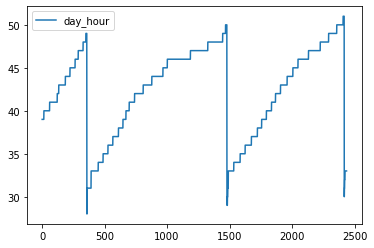

In [215]:
macron_pd2 = macron_pd[['day_hour', 0]].copy()
macron_pd2.plot()

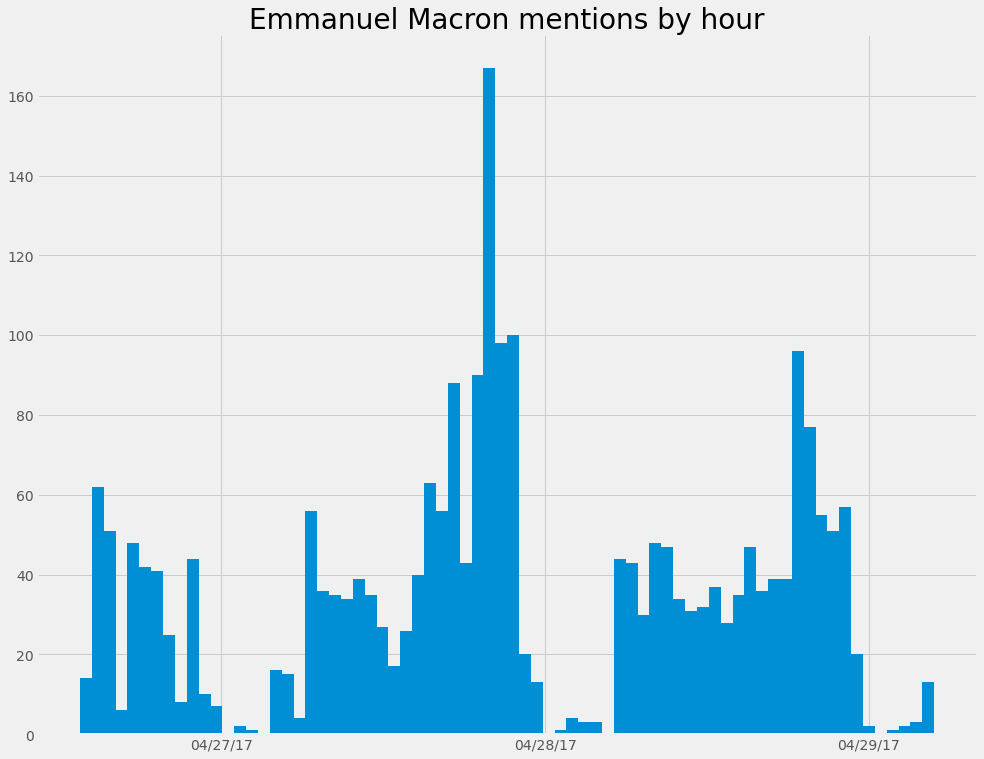

In [241]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.style.use('fivethirtyeight')

day = mdates.DayLocator()   # every year
hour = mdates.HourLocator()  # every month
day_fmt = mdates.DateFormatter('%D')

fig, ax = plt.subplots(figsize=(15,12))

ax.hist(macron_pd['Date'], bins=72)
ax.xaxis.set_major_locator(day)
ax.xaxis.set_major_formatter(day_fmt)
ax.xaxis.set_minor_locator(hour)
ax.set_title("Emmanuel Macron mentions by hour", fontsize=28)
plt.savefig('img/Marcon_mentions.png')
plt.show()

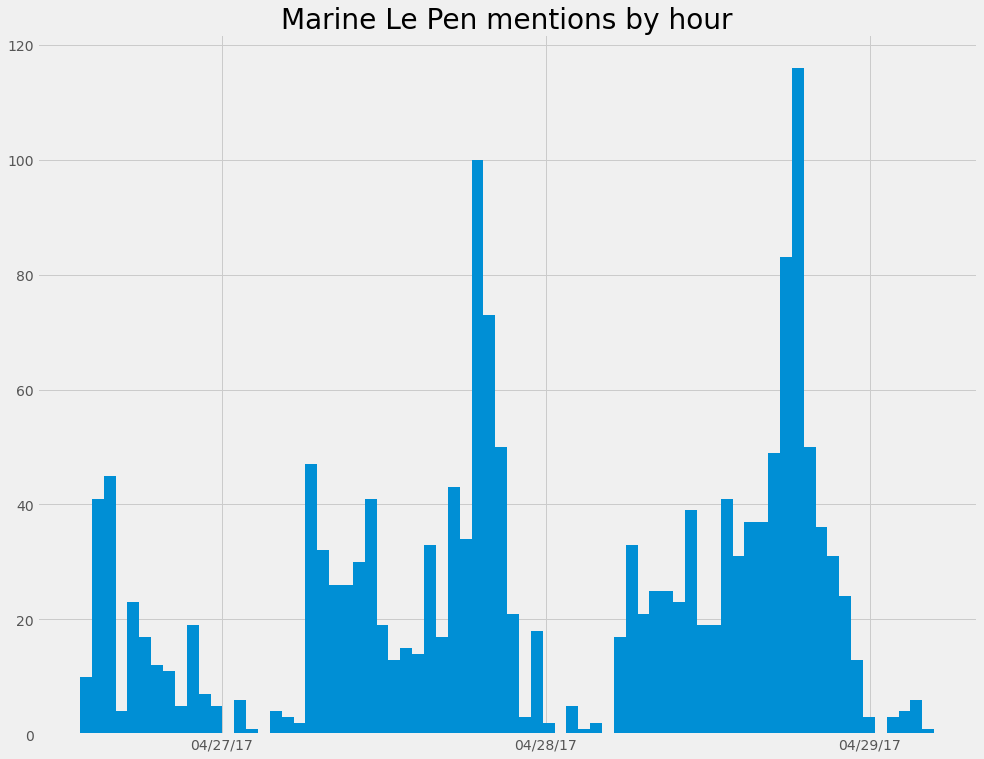

In [246]:
plt.style.use('fivethirtyeight')

day = mdates.DayLocator()   # every year
hour = mdates.HourLocator()  # every month
day_fmt = mdates.DateFormatter('%D')

fig, ax = plt.subplots(figsize=(15,12))

ax.hist(mlp_pd['Date'], bins=72)
ax.xaxis.set_major_locator(day)
ax.xaxis.set_major_formatter(day_fmt)
ax.xaxis.set_minor_locator(hour)
ax.set_title("Marine Le Pen mentions by hour", fontsize=28)
plt.savefig('img/MLP_mentions.png')
plt.show()



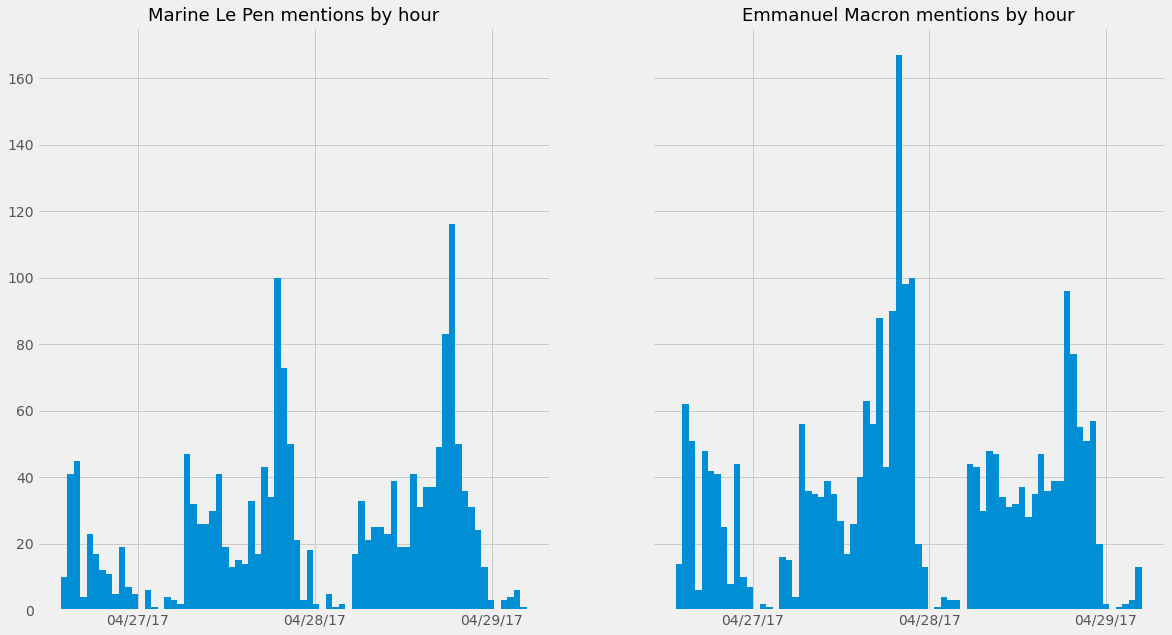

In [249]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,10),sharey=True)
ax1.hist(mlp_pd['Date'], bins=72)
ax1.xaxis.set_major_locator(day)
ax1.xaxis.set_major_formatter(day_fmt)
ax1.xaxis.set_minor_locator(hour)
ax1.set_title("Marine Le Pen mentions by hour", fontsize=18)

ax2.hist(macron_pd['Date'], bins=72)
ax2.xaxis.set_major_locator(day)
ax2.xaxis.set_major_formatter(day_fmt)
ax2.xaxis.set_minor_locator(hour)
ax2.set_title("Emmanuel Macron mentions by hour", fontsize=18)
plt.savefig('img/MLP_Marcon_together.png')
plt.show()